# AI-BEG04-CH02-TH02: CÁC KỸ THUẬT THƯỜNG SỬ DỤNG TRONG FEATURE ENGINEERING (PHẦN 2)

## Import thư viên

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

## Đọc dữ liệu   
Tên tập dữ liệu: Các loại ngũ cốc (cereal)

Mô tả:
Tập dữ liệu "Cereal" cung cấp thông tin về các sản phẩm ngũ cốc của các hãng sản xuất khác nhau. Dữ liệu này được sử dụng để phân tích các thông số dinh dưỡng và đánh giá chất lượng của các loại ngũ cốc trên thị trường.

Các trường dữ liệu trong tập dữ liệu bao gồm:

1. Name: Tên của ngũ cốc.
2. mfr: Nhà sản xuất ngũ cốc, được đại diện bằng các ký tự viết tắt:
   - A = American Home Food Products
   - G = General Mills
   - K = Kelloggs
   - N = Nabisco
   - P = Post
   - Q = Quaker Oats
   - R = Ralston Purina

3. type: Loại ngũ cốc (lạnh hoặc nóng).
4. calories: Lượng calo trong mỗi khẩu phần.
5. protein: Lượng protein tính bằng gam.
6. fat: Lượng chất béo tính bằng gam.
7. sodium: Lượng natri tính bằng miligam.
8. fiber: Lượng chất xơ trong khẩu phần tính bằng gam.
9. carbo: Lượng carbohydrate phức tạp trong khẩu phần tính bằng gam.
10. sugars: Lượng đường trong khẩu phần tính bằng gam.
11. potass: Lượng kali tính bằng miligam.
12. vitamins: Thành phần vitamin và khoáng chất - 0, 25 hoặc 100, cho biết tỷ lệ phần trăm thường được khuyến nghị bởi Cơ quan Quản lý Thực phẩm và Dược phẩm Hoa Kỳ (FDA).
13. shelf: Kệ trưng bày sản phẩm (1, 2 hoặc 3, đếm từ sàn nhà lên).
14. weight: Trọng lượng một khẩu phần tính bằng ounce (oz).
15. cups: Số ly (cốc) trong một khẩu phần.
16. rating: Điểm đánh giá của ngũ cốc - Biến mục tiêu

Tập dữ liệu này có thể được sử dụng để phân tích các đặc tính dinh dưỡng và so sánh chất lượng giữa các loại ngũ cốc khác nhau từ các nhà sản xuất khác nhau.

In [77]:
def train_eval(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred, average='macro')
    return f1

In [49]:
df = pd.read_csv('../6-Tài nguyên/cereal.csv', delimiter=',')
print(df.shape)
df.head(2)

(77, 16)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679


In [50]:
# Loại bỏ cột "name" và "mfr" do 2 cột này không hỗ trợ dự đoán mô hình (Domain Knowledge)
df = df.drop(["name","mfr"], axis='columns')
print(df.shape)
display(df.head(2))
df.info()

(77, 14)


,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   type      77 non-null     object 
 1   calories  77 non-null     int64  
 2   protein   77 non-null     int64  
 3   fat       77 non-null     int64  
 4   sodium    77 non-null     int64  
 5   fiber     77 non-null     float64
 6   carbo     77 non-null     float64
 7   sugars    77 non-null     int64  
 8   potass    77 non-null     int64  
 9   vitamins  77 non-null     int64  
 10  shelf     77 non-null     int64  
 11  weight    77 non-null     float64
 12  cups      77 non-null     float64
 13  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(1)
memory usage: 8.5+ KB


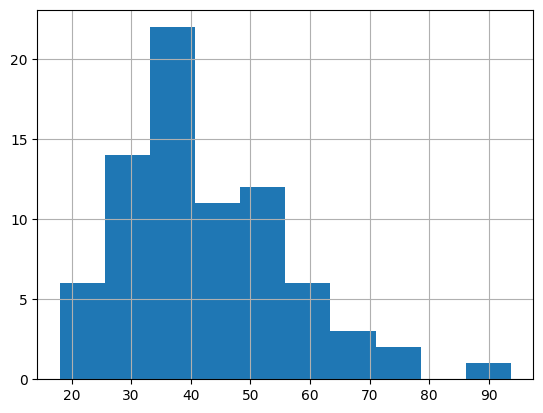

In [51]:
df['rating'].hist()
plt.show();

ta sẽ biến biến 'rating' thành biến lập nhóm với 2 giá trị là '<45' và '>=45'

In [52]:
df['rating'] = df['rating'].map(lambda x: '<45' if x < 45 else '>=45')
print(df['rating'].value_counts())

<45     48
>=45    29
Name: rating, dtype: int64


In [20]:
for col in df.columns:
    print(col, df[col].nunique())

type 2
calories 11
protein 6
fat 5
sodium 27
fiber 13
carbo 22
sugars 17
potass 36
vitamins 3
shelf 3
weight 7
cups 12
rating 2


### Mã hóa One-hot cho biến 'type'

In [53]:
df_encoded = df.copy()

# One-hot encoder cho đặc trưng 'type'
df_dummy = pd.get_dummies(df_encoded['type'])
df_dummy.columns = [f"type_{i}" for i in df_dummy.columns]
df_encoded = pd.concat([df_encoded, df_dummy], axis=1)
df_encoded = df_encoded.drop(["type"], axis='columns')

print(df_encoded.shape)
df_encoded.head(2)

(77, 15)


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,type_C,type_H
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,>=45,1,0
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,<45,1,0


## Áp dụng PCA

#### Ngoài 'type' là đặc trưng lập nhóm và chỉ có 2 giá trị, nên biến này sẽ được encode theo dạng One-hot và áp dụng PCA để giữ lại 95% lượng thông tin

In [54]:
from sklearn.decomposition import PCA

In [55]:
df_pca = df.copy()
df_dummy = pd.get_dummies(df['type'])

# Xác định số lượng thành phần chính cần giữ lại
pca = PCA(n_components=df_dummy.shape[1])
pca.fit(df_dummy)
info = pca.explained_variance_ratio_
num_components = np.where(info >= 0.95)[0][-1] + 1
print(f"số lượng thành phần chính cần giữ lại: {num_components}")

# Chạy PCA với số lượng thành phần mới này
pca = PCA(n_components=num_components)
df_dummy_trans = pca.fit_transform(df_dummy)
df_dummy_trans = pd.DataFrame(df_dummy_trans)
df_dummy_trans.columns = [f"type_{i}" for i in df_dummy_trans.columns]

df_pca = pd.concat([df_pca, df_dummy_trans], axis=1)
df_pca = df_pca.drop(["type"], axis='columns')
print(df_pca.shape)
df_pca.head(2)

số lượng thành phần chính cần giữ lại: 1
(77, 14)


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,type_0
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,>=45,-0.055099
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,<45,-0.055099


### Quan sát dữ liệu với t-SNE

In [44]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=40)
X_tsne = tsne.fit_transform(df_pca.drop(columns='rating'))

In [46]:
import plotly.express as px

# Vẽ biểu đồ 3D
fig = px.scatter_3d(x=X_tsne[:,0], y=X_tsne[:,1], z=X_tsne[:,2], color = df_pca['rating'])
fig.show()

## Áp dụng LDA

Mã hóa đặc trưng 'type' bằng One-hot Encoder.

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [71]:
lda = LinearDiscriminantAnalysis(n_components=1)
df_lda = df.copy()

# One-hot encoder cho đặc trưng 'type'
df_dummy = pd.get_dummies(df_lda['type'])
df_lda = pd.concat([df_lda, df_dummy], axis=1)
df_lda = df_lda.drop(["type"], axis='columns')

# Thực hiện LDA
X_lda = lda.fit_transform(df_lda.drop(columns='rating'), df_lda['rating'].values)
df_lda = pd.DataFrame(X_lda)
df_lda['rating'] = df['rating']
print(df_lda.shape)
df_lda.head(2)

(77, 2)


,0,rating
0,2.925473,>=45
1,-1.008635,<45


## So sánh kết quả mô hình sử dụng các loại Feature Extractor khác nhau

### Dữ liệu ban đầu

In [106]:
RESULT = {}

In [108]:
RESULT['f1_original'] = train_eval(df_encoded.drop(columns='rating'), df_encoded['rating'].values)
print(RESULT['f1_original'] )

0.8666666666666667


### PCA

In [109]:
RESULT['f1_pca'] = train_eval(df_pca.drop(columns='rating'), df_pca['rating'].values)
print(RESULT['f1_pca'])

0.7922077922077921


### Mô hình sử dụng LDA

In [110]:
RESULT['f1_lda'] = train_eval(df_lda.drop(columns='rating'), df_lda['rating'].values)
print(RESULT['f1_lda'])

0.9307359307359306


### So sánh kết quả

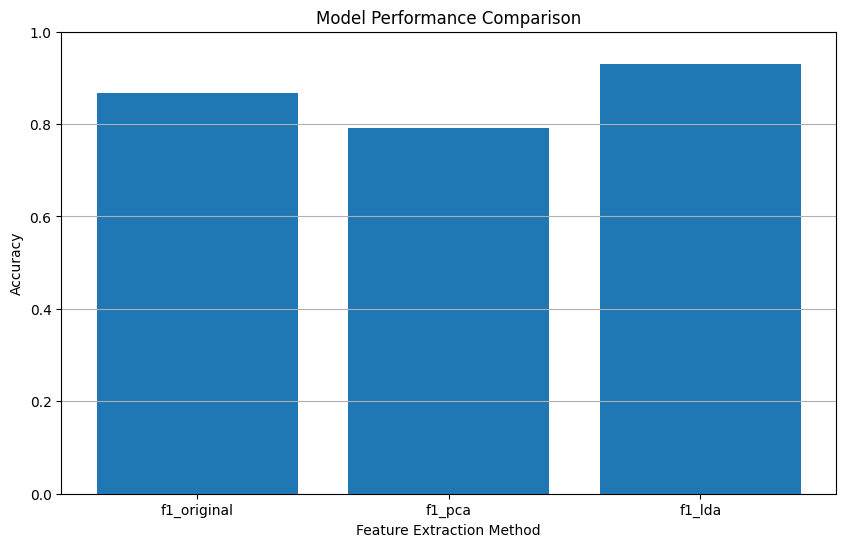

In [111]:
import matplotlib.pyplot as plt

# Create a bar chart to compare the model performance
plt.figure(figsize=(10, 6))
plt.bar(RESULT.keys(), RESULT.values())
plt.title('Model Performance Comparison')
plt.xlabel('Feature Extraction Method')
plt.ylabel('F1 score')
plt.ylim(0, 1.0)
plt.grid(axis='y')
plt.show();

Với một bộ dữ liệu đơn giản, LDA cho kết quả tốt nhất, và do đặc trưng 'type' chỉ có 2 giá trị, nên việc thực hiện PCA sau khi mã hóa One-hot để giảm chiều từ 2 xuống 1 không giúp nhiều trong việc dự đoán.

## Feature Construction

In [87]:
for col in df.columns:
    print(col, df[col].nunique())

type 2
calories 11
protein 6
fat 5
sodium 27
fiber 13
carbo 22
sugars 17
potass 36
vitamins 3
shelf 3
weight 7
cups 12
rating 2


Đặc trưng 'potass' có 36 giá trị khác nhau, 'carbo' có 22 giá trị khác nhau và 'sodium' có 27 giá trị khác nhau, trong khi tổng số lượng mẫu là 77, nên ta có thể thực hiện binning cho các biến này.

### Phương pháp Binning

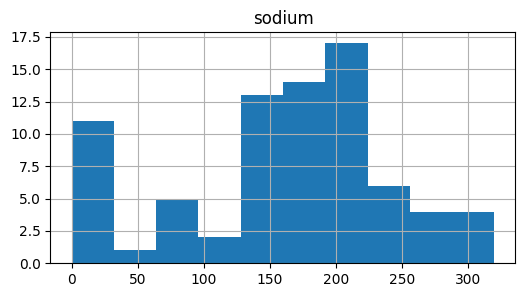

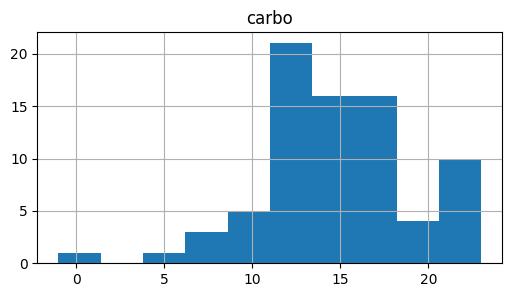

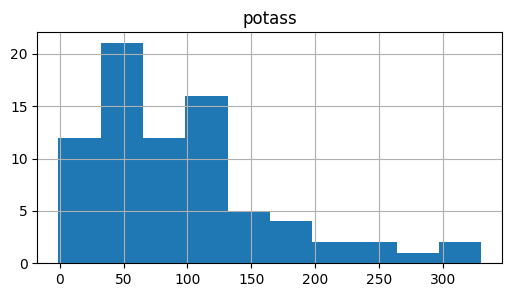

In [90]:
bin_cols = ['sodium', 'carbo', 'potass']

for col in bin_cols:
    plt.figure(figsize=(6,3))
    df[col].hist()
    plt.title(col)
    plt.show();

# data['age_bin'] = pd.cut(data['age'], bins=[18, 30, 45, 65], labels=['young', 'middle-aged', 'elderly'])

Cắt đều các đặc trưng này thành những class có số lượng mẫu tương đương nhau (Quantile Cut) và gắn số cho từng giá trị mới (Label Encoding).

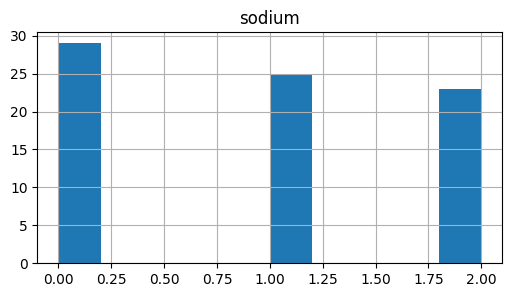

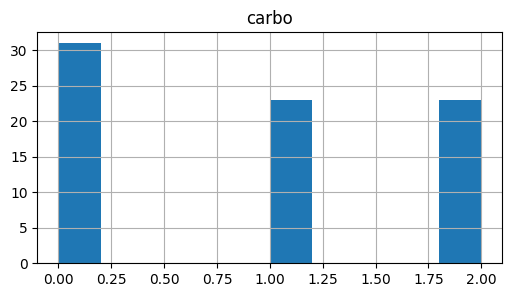

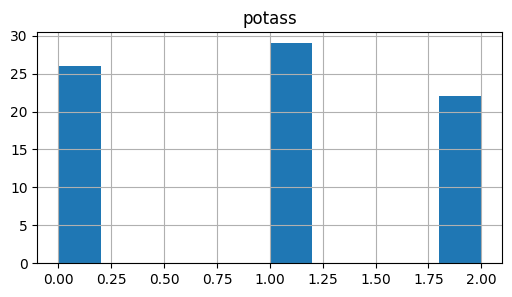

In [114]:
df_binning = df_encoded.copy()

for col in bin_cols:
    df_bin = pd.qcut(df_binning[col], 3, labels=[*range(3)])
    df_binning[col] = df_bin

    plt.figure(figsize=(6,3))
    df_bin.hist()
    plt.title(col)
    plt.show();

In [115]:
display(df_binning.head())

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,type_C,type_H
0,70,4,1,0,10.0,0,6,2,25,3,1.0,0.33,>=45,1,0
1,120,3,5,0,2.0,0,8,2,0,3,1.0,1.00,<45,1,0
2,70,4,1,2,9.0,0,5,2,25,3,1.0,0.33,>=45,1,0
3,50,4,0,0,14.0,0,0,2,25,3,1.0,0.50,>=45,1,0
4,110,2,2,1,1.0,1,8,0,25,3,1.0,0.75,<45,1,0


### Scaling

In [ ]:
scaler = MinMaxScaler()
data['scaled_income'] = scaler.fit_transform(data[['income']])

print("\nData with Scaled Income:")
print(data.head())



Data with Scaled Income:
   age  income  purchased      age_bin  scaled_income
0   56   22695          1      elderly       0.031360
1   46   68190          0      elderly       0.604569
2   32   25258          1  middle-aged       0.063652
3   60   59504          1      elderly       0.495130
4   25   53159          1        young       0.415187


### Phương pháp Polynomial Feature

Việc thực hiện Polynomial Feature yêu cầu hiểu biết về dữ liệu và tính chất của đặc trưng (Domain Knowledge), trong dữ liệu này ta thử phương pháp này với 1 đặc trưng ngẫu nhiên 'weight' để xem phản ứng của mô hình như thế nào

In [118]:
df_poly = df_encoded.copy()

poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(df_poly[['weight']])
poly_feature_names = [f"weight_mu{i+1}" for i in range(poly_features.shape[1])]

_poly = pd.DataFrame(poly_features, columns=poly_feature_names)
df_poly = pd.concat([df_poly, _poly], axis=1)

# Loại bỏ đặc trưng ban đầu của weight
df_poly = df_poly.drop(columns=['weight', 'weight_mu1'])

display(df_poly.head())

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,cups,rating,type_C,type_H,weight_mu2,weight_mu3
0,70,4,1,130,10.0,5.0,6,280,25,3,0.33,>=45,1,0,1.0,1.0
1,120,3,5,15,2.0,8.0,8,135,0,3,1.00,<45,1,0,1.0,1.0
2,70,4,1,260,9.0,7.0,5,320,25,3,0.33,>=45,1,0,1.0,1.0
3,50,4,0,140,14.0,8.0,0,330,25,3,0.50,>=45,1,0,1.0,1.0
4,110,2,2,200,1.0,14.0,8,-1,25,3,0.75,<45,1,0,1.0,1.0


### Aggregation Features

Do đặc trưng 'potass' có khá nhiều giá trị nên ta thử tính trung lượng potass có trong mỗi giá trị của biến 'calories'

In [122]:
df_agg = df_encoded.copy()

aggregated_data = df_agg.groupby('calories')['potass'].mean().reset_index()
aggregated_data.columns = ['calories', 'mean_potass_per_cal']

df_agg = df_agg.merge(aggregated_data, on='calories', how='left')

display(df_agg.head())

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,type_C,type_H,mean_potass_per_cal
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,>=45,1,0,300.000000
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,<45,1,0,129.000000
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,>=45,1,0,300.000000
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,>=45,1,0,131.666667
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,<45,1,0,51.689655


In [117]:
RESULT['f1_binning'] = train_eval(df_binning.drop(columns='rating'), df_binning['rating'].values)
print(RESULT['f1_binning'])

0.8666666666666667


In [119]:
RESULT['f1_poly'] = train_eval(df_poly.drop(columns='rating'), df_poly['rating'].values)
print(RESULT['f1_poly'])

0.8666666666666667


In [123]:
RESULT['f1_agg'] = train_eval(df_agg.drop(columns='rating'), df_agg['rating'].values)
print(RESULT['f1_agg'])

0.8666666666666667


## So sánh tất cả kết quả

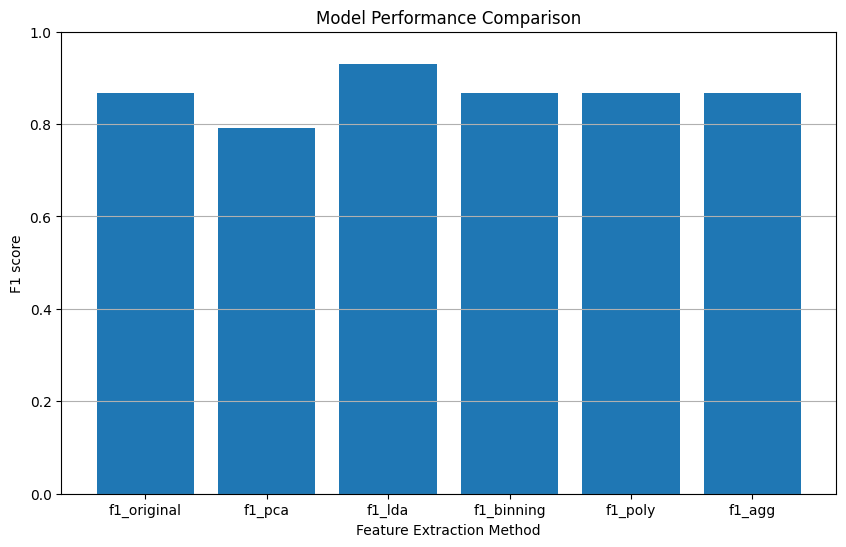

In [125]:
plt.figure(figsize=(10, 6))
plt.bar(RESULT.keys(), RESULT.values())
plt.title('Model Performance Comparison')
plt.xlabel('Feature Extraction Method')
plt.ylabel('F1 score')
plt.ylim(0, 1.0)
plt.grid(axis='y')
plt.show();

Ta quan sát thấy với một bộ dữ liệu nhỏ 77 mẫu có 16 biến thì việc giảm chiều dữ liệu sẽ giúp mô hình học thông tin tốt hơn là tạo thêm dặc trưng.